In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [4]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [5]:
google_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2004-12-13,4.230138,4.245337,4.313333,4.220431,4.288177,193466452
2004-12-14,4.434634,4.450568,4.453806,4.224167,4.259036,445198482
2004-12-15,4.461685,4.477716,4.500381,4.400008,4.433134,460559845
2004-12-16,4.379539,4.395275,4.495400,4.382324,4.407231,344197318
2004-12-17,4.469130,4.485188,4.495649,4.397268,4.402498,296555412


In [6]:
google_data.shape

(5035, 6)

In [7]:
google_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
count,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5.035000e+03
mean,48.088717,48.253269,48.738663,47.750102,48.231093,1.096866e+08
std,45.959419,46.102451,46.574879,45.617012,46.068134,1.425175e+08
min,4.230138,4.245337,4.313333,4.220431,4.259036,1.584340e+05
25%,13.259480,13.307122,13.430659,13.174369,13.323809,2.661400e+07
50%,27.850691,27.950762,28.222515,27.731113,28.006500,5.133455e+07
75%,63.307777,63.535250,64.079750,62.805300,63.549999,1.334062e+08
max,196.710007,196.710007,196.889999,193.970001,196.320007,1.650833e+09


In [8]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5035 entries, 2004-12-13 to 2024-12-12
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GOOG)  5035 non-null   float64
 1   (Close, GOOG)      5035 non-null   float64
 2   (High, GOOG)       5035 non-null   float64
 3   (Low, GOOG)        5035 non-null   float64
 4   (Open, GOOG)       5035 non-null   float64
 5   (Volume, GOOG)     5035 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.4 KB


In [9]:
google_data.isna().sum()

Price      Ticker
Adj Close  GOOG      0
Close      GOOG      0
High       GOOG      0
Low        GOOG      0
Open       GOOG      0
Volume     GOOG      0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

<Figure size 1500x500 with 0 Axes>

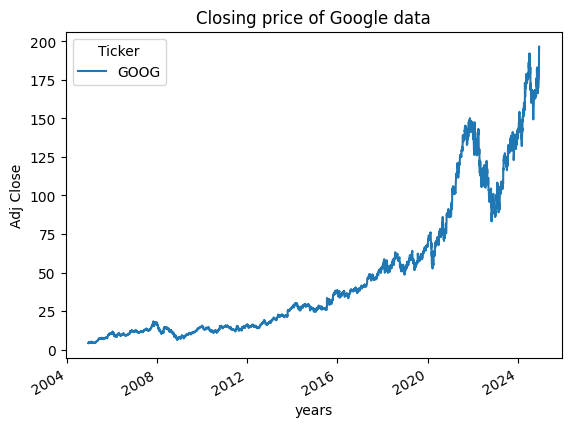

In [11]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [12]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    

In [13]:
google_data.columns

MultiIndex([('Adj Close', 'GOOG'),
            (    'Close', 'GOOG'),
            (     'High', 'GOOG'),
            (      'Low', 'GOOG'),
            (     'Open', 'GOOG'),
            (   'Volume', 'GOOG')],
           names=['Price', 'Ticker'])

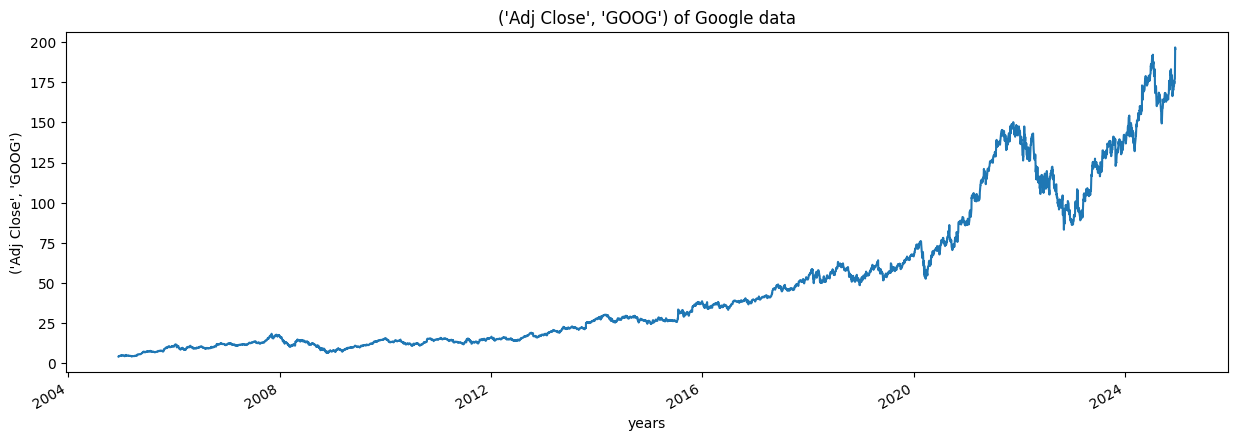

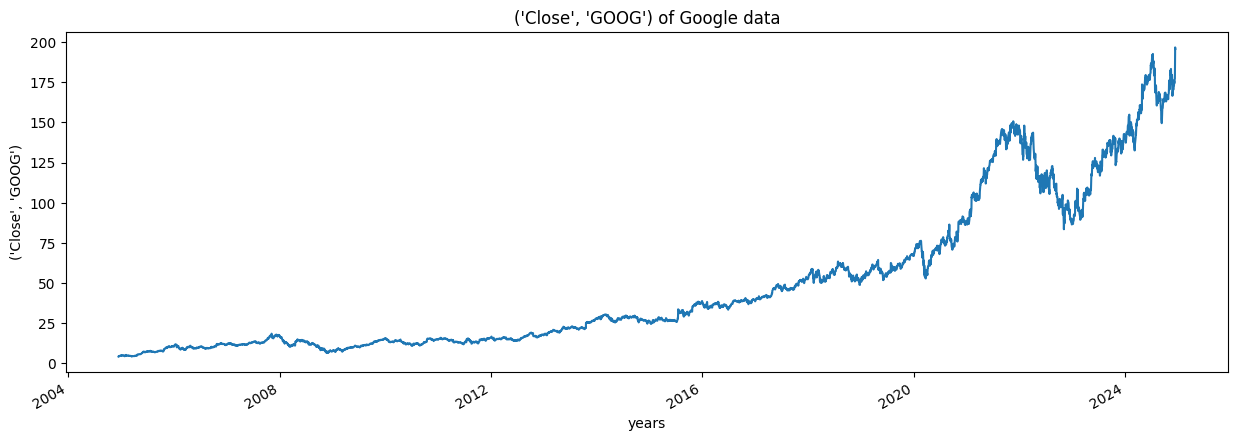

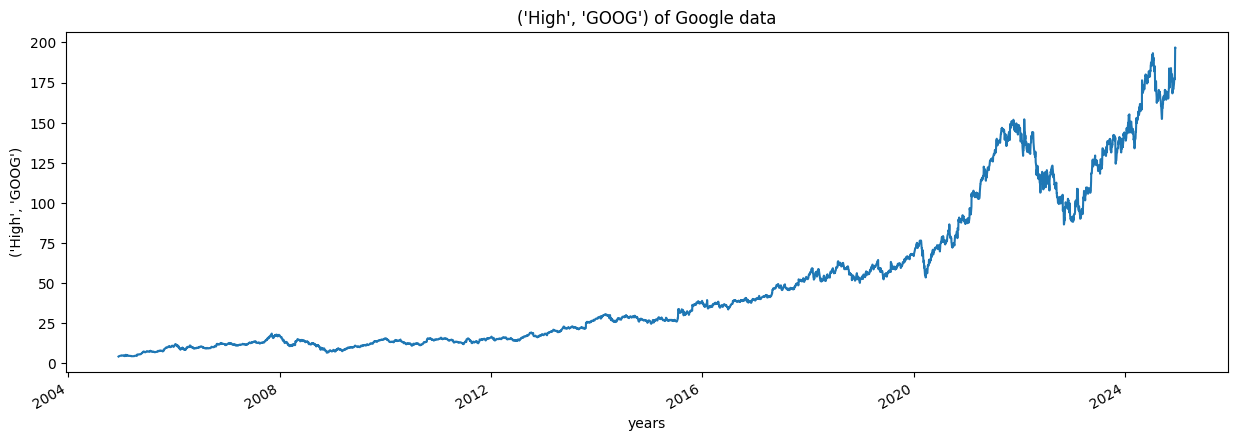

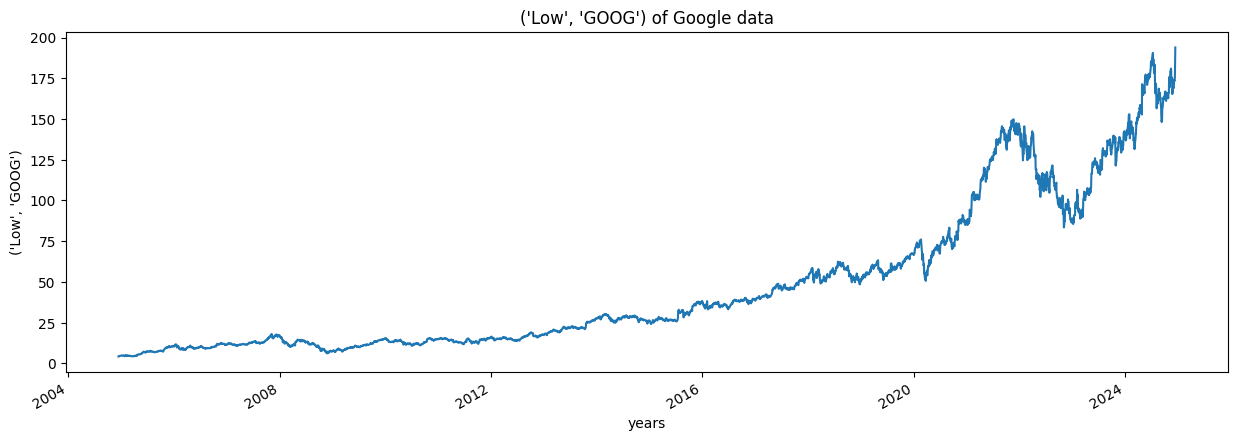

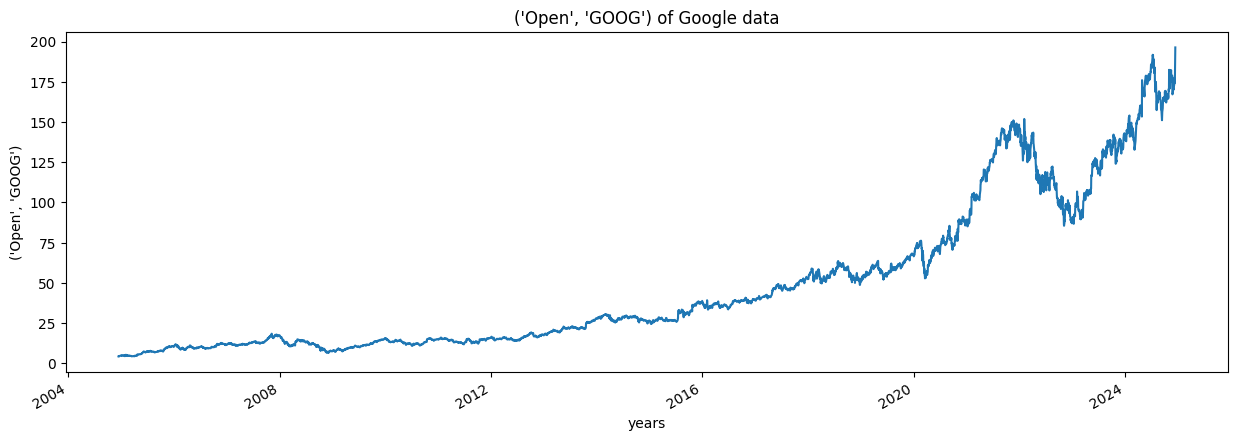

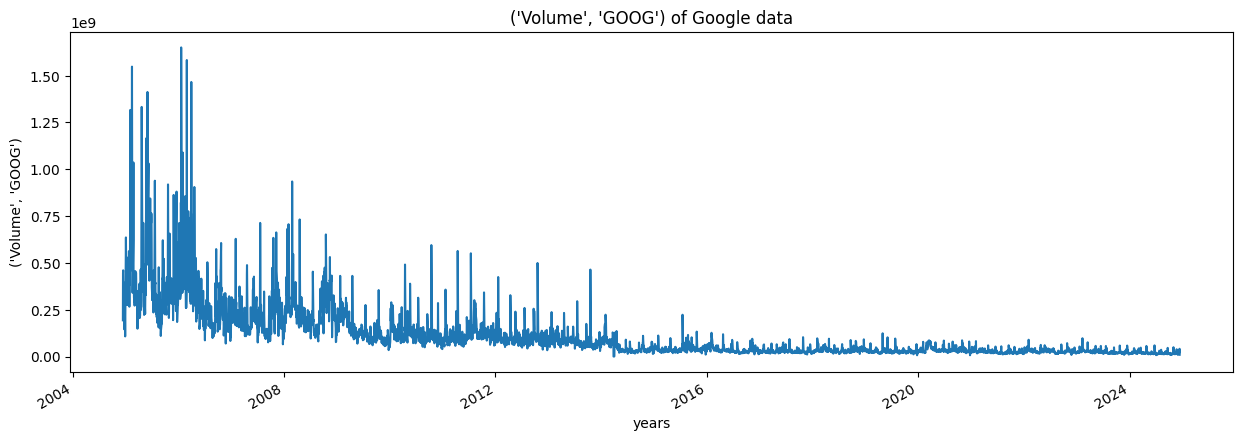

In [14]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [15]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [16]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [17]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [18]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 14
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 240


In [19]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [20]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-12-01         NaN
2005-12-02         NaN
2005-12-05         NaN
2005-12-06         NaN
2005-12-07    6.535939
Name: MA_for_250_days, dtype: float64

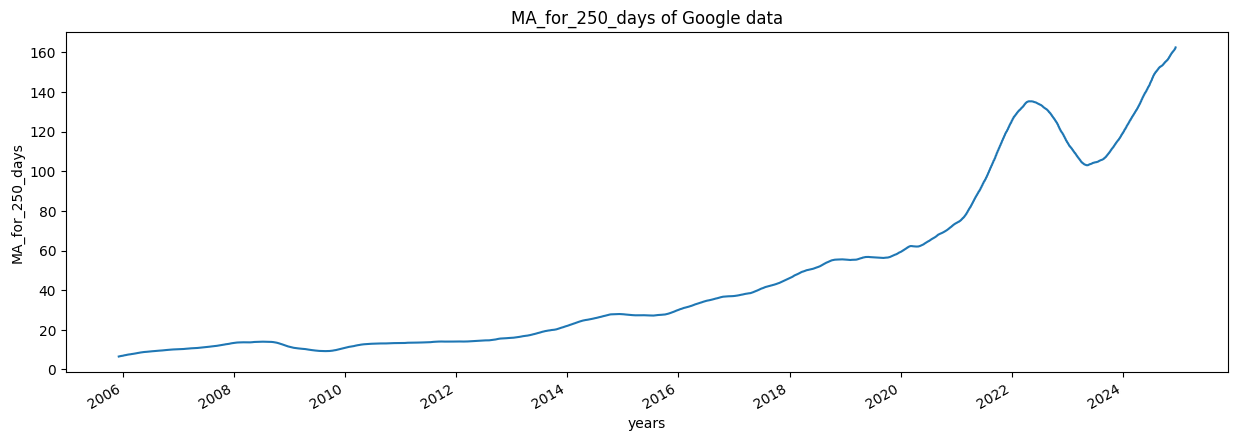

In [21]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

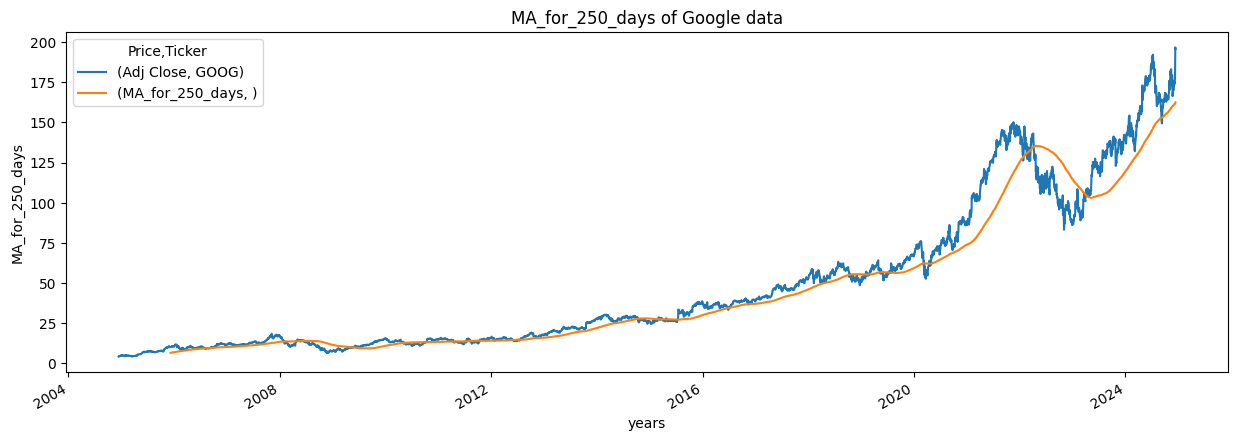

In [22]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

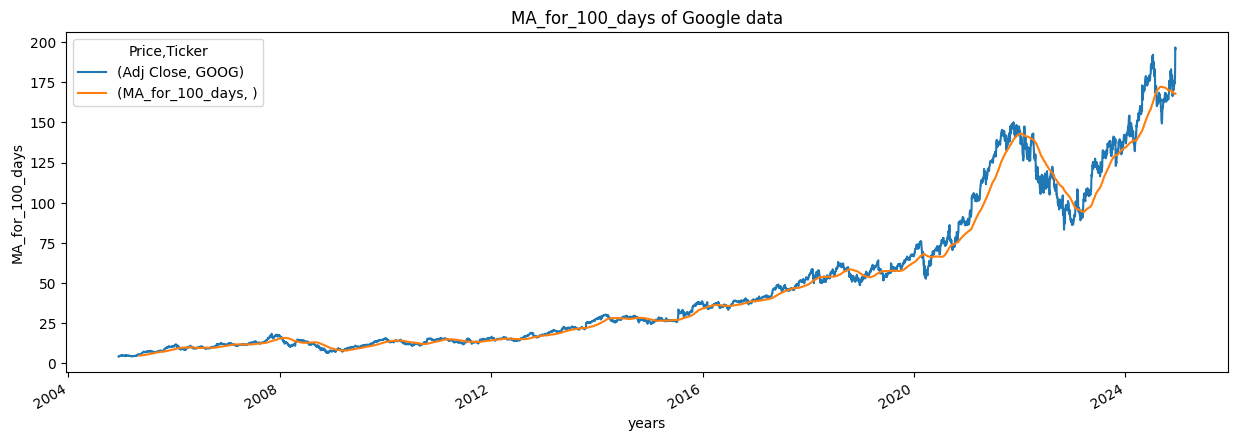

In [23]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

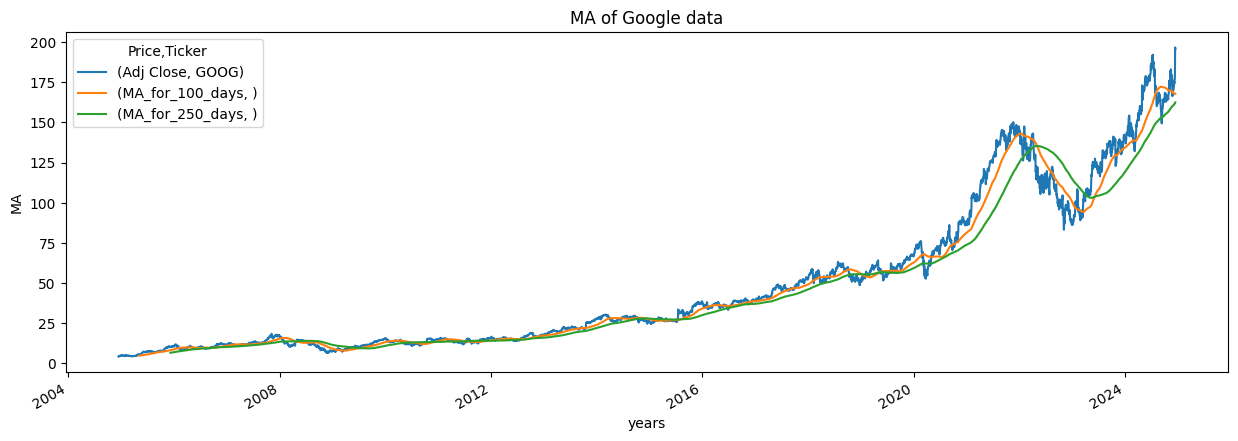

In [24]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [25]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

Price,Adj Close,percentage_change_cp
Ticker,GOOG,
Date,,
2004-12-13,4.230138,NaN
2004-12-14,4.434634,0.048343
2004-12-15,4.461685,0.006100
2004-12-16,4.379539,-0.018411
2004-12-17,4.469130,0.020457


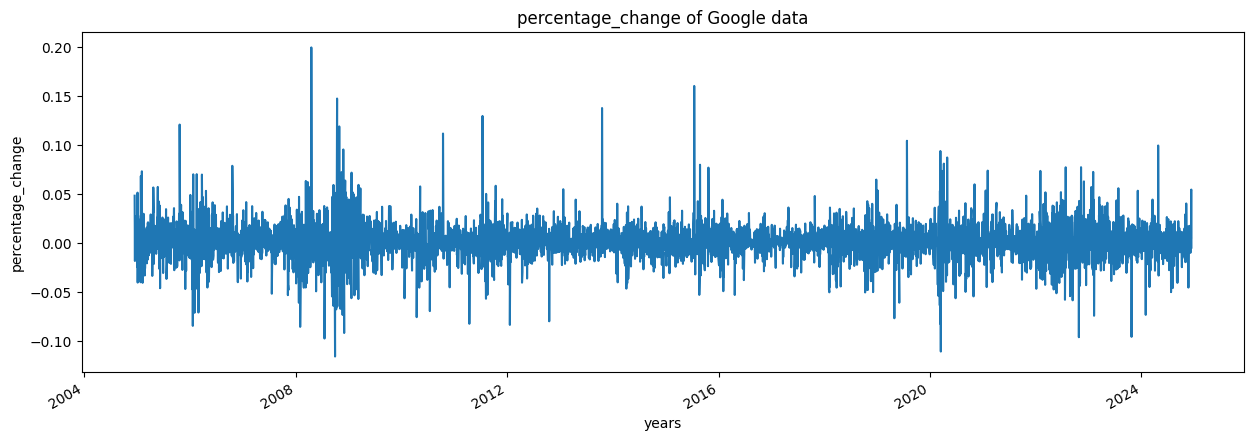

In [26]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [27]:
Adj_close_price = google_data[['Adj Close']]

In [28]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([196.71000671]), array([4.23013783]))

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.        ],
       [0.00106243],
       [0.00120297],
       ...,
       [0.94711131],
       [1.        ],
       [0.99511739]])

In [30]:
len(scaled_data)

5035

In [31]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [32]:
x_data[0],y_data[0]

(array([[0.        ],
        [0.00106243],
        [0.00120297],
        [0.00077619],
        [0.00124165],
        [0.00187859],
        [0.00171484],
        [0.00204363],
        [0.00224992],
        [0.00276696],
        [0.00287655],
        [0.0028946 ],
        [0.0035006 ],
        [0.00288042],
        [0.00415946],
        [0.0031009 ],
        [0.00297325],
        [0.00233373],
        [0.00301709],
        [0.0031731 ],
        [0.00297712],
        [0.00321436],
        [0.00320792],
        [0.00380618],
        [0.00431289],
        [0.00346192],
        [0.00302611],
        [0.00229892],
        [0.00132417],
        [0.00086   ],
        [0.0024227 ],
        [0.00227314],
        [0.00256453],
        [0.00324531],
        [0.00276567],
        [0.0045785 ],
        [0.00521028],
        [0.0043722 ],
        [0.00329817],
        [0.00363469],
        [0.00272441],
        [0.00226024],
        [0.00218546],
        [0.00290621],
        [0.00319502],
        [0

In [33]:

int(len(x_data)*0.7)

3454

In [34]:
4908-100-int(len(x_data)*0.7)

1354

In [35]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3454, 100, 1)
(3454, 1)
(1481, 100, 1)
(1481, 1)


In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [39]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Users\vmgow\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
from keras.models import Sequential
from keras.layers import Input, Dense, LSTM

# Define the Sequential model
model = Sequential()

# Add the Input layer explicitly
model.add(Input(shape=(x_train.shape[1], 1)))

# Add LSTM layers
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=False))

# Add Dense layers
model.add(Dense(25))
model.add(Dense(1))


In [42]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [43]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3454/3454 ━━━━━━━━━━━━━━━━━━━━ 80s 23ms/step - loss: 2.4079e-04
Epoch 2/2
3454/3454 ━━━━━━━━━━━━━━━━━━━━ 86s 25ms/step - loss: 9.0856e-05


In [44]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [45]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [46]:
predictions


array([[0.27330676],
       [0.27248162],
       [0.2705879 ],
       ...,
       [0.8620743 ],
       [0.88199675],
       [0.9146752 ]], dtype=float32)

In [47]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 56.836185],
       [ 56.677364],
       [ 56.31286 ],
       ...,
       [170.1621  ],
       [173.99677 ],
       [180.2867  ]], dtype=float32)

In [48]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 53.31244278],
       [ 52.84113312],
       [ 54.2580452 ],
       ...,
       [186.52999878],
       [196.71000671],
       [195.77020264]])

In [49]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [50]:
rmse

3.790995013197324

In [51]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-01-28,53.312443,56.836185
2019-01-29,52.841133,56.677364
2019-01-30,54.258045,56.312859
2019-01-31,55.618656,56.624748
2019-02-01,55.338661,57.500950


<Figure size 640x480 with 0 Axes>

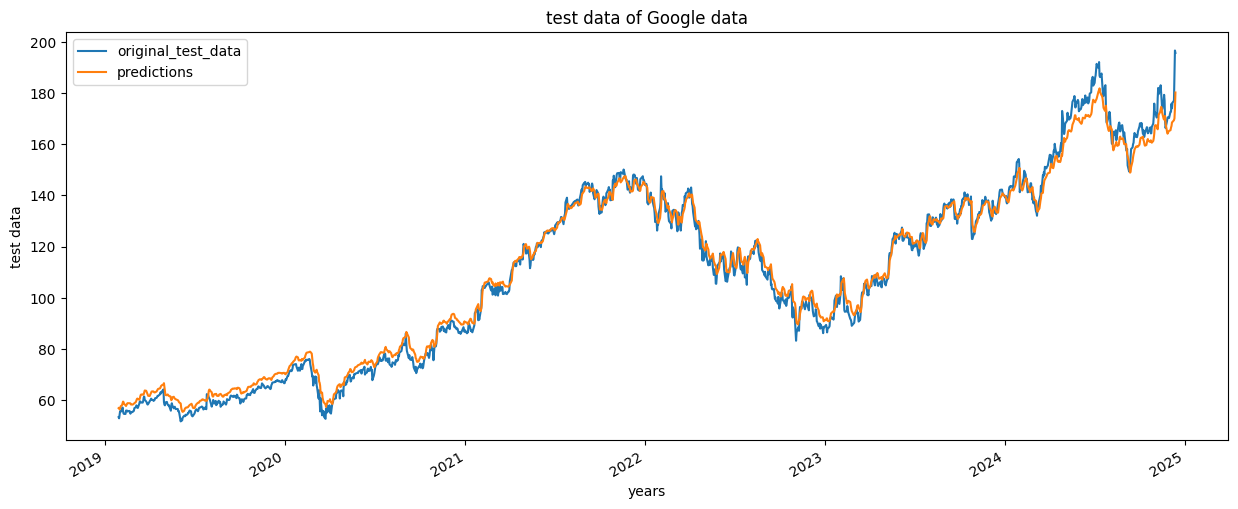

In [52]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

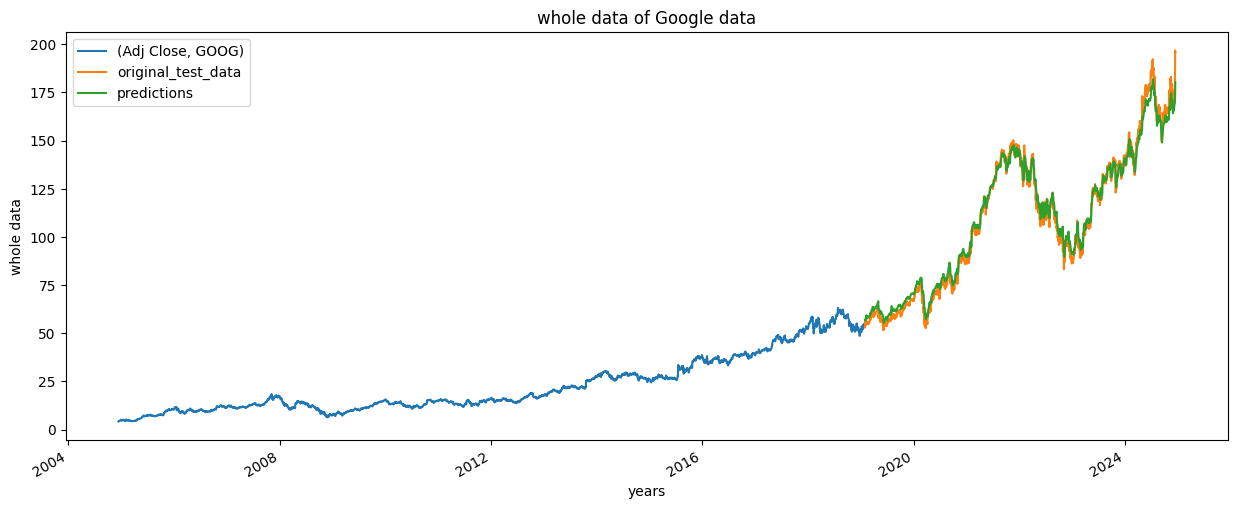

In [53]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [54]:
model.save("Latest_stock_price_model.keras")